In [10]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization.Interval2d import Interval2d
from interClusLib.visualization.Interval3d import Interval3d
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates
from interClusLib.visualization.IntervalRadarChart import IntervalRadarChart

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.make_interval_blobs(n_samples=30, n_clusters=4, n_dims = 5)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          2.434310         3.030369         0.763350         2.239479   
1         -0.247213         0.895133        -5.655832        -4.299411   
2          4.569429         4.669429         2.840542         5.100403   
3          0.287266         0.759486        -5.352876        -5.252876   
4          5.104281         5.204281         0.710939         1.853487   
5          8.332168        11.224495         0.563962         2.360176   
6          7.159706        10.936216        -0.390838         1.310484   
7          4.337084         4.920739         3.847608         5.586053   
8          8.591957         8.845618        -5.689610        -3.219704   
9          8.259112        11.514402        -0.807307         0.564250   
10         0.716840         2.231036        -5.221365        -3.367

In [11]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 10)
30


30
[[1.         0.         0.1665834  0.         0.51139369 0.35494738
  0.04740711 0.28372478 0.10222653 0.09075315 0.         0.41660947
  0.16523506 0.         0.06945224 0.03207515 0.11168773 0.27929501
  0.         0.27373636 0.1026398  0.         0.         0.
  0.07773098 0.48526403 0.19107651 0.         0.02771594 0.3979576 ]
 [0.         1.         0.         0.09742029 0.02004859 0.
  0.         0.         0.1098358  0.         0.15431618 0.
  0.         0.15582135 0.04866532 0.07556477 0.         0.
  0.06489247 0.         0.         0.08058101 0.11588674 0.0921286
  0.10101068 0.         0.         0.06924258 0.10375232 0.        ]
 [0.1665834  0.         1.         0.         0.15923504 0.10603679
  0.00631603 0.22813456 0.09509843 0.14583121 0.         0.26672265
  0.22888503 0.         0.07971669 0.1358187  0.12146339 0.07456788
  0.07850824 0.36393959 0.11167472 0.         0.16693329 0.
  0.         0.21433486 0.05565724 0.10947314 0.         0.25806463]
 [0.         0.

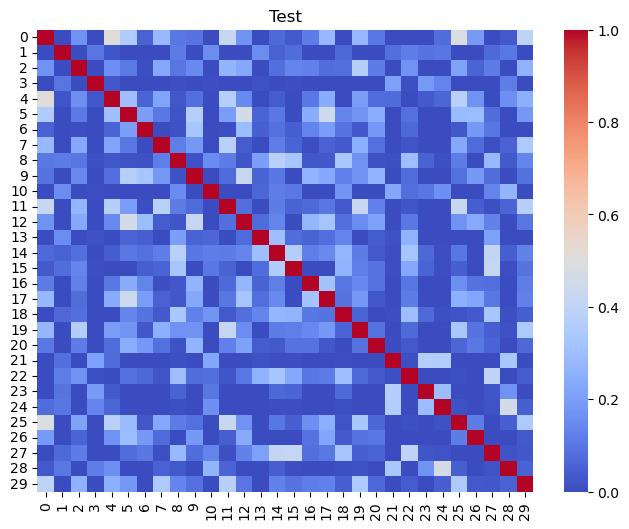

In [12]:
print(random_data.get_intervals().shape[0])

from interClusLib.metric import *
distance_matrix = pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [19]:
model = IntervalKMeans(n_clusters=4,max_iter=100,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)
print(model.centroids_)

[3 2 3 2 3 3 3 3 0 3 2 3 3 0 0 1 3 3 0 3 3 2 0 2 2 3 3 0 2 3]
[[[  8.42055894   9.71605516]
  [ -5.51946115  -3.4608109 ]
  [  0.49389492   2.83145809]
  [ -0.13397918   2.50005208]
  [ 10.4982892   10.87475278]]

 [[  6.45444266   8.04291751]
  [ -5.71301104  -2.12292368]
  [ -1.25058102   1.75545964]
  [ -0.39982643   1.6718425 ]
  [  8.55077073  10.80243366]]

 [[  0.84188638   2.01750483]
  [ -4.77433579  -4.11708565]
  [  8.34915608   9.64155105]
  [ -4.83251472  -3.08763391]
  [ -1.79968533  -0.18935253]]

 [[  5.96452876   7.41906876]
  [  1.15262249   2.74013839]
  [-10.72108974  -8.16291429]
  [ -5.24506193  -3.39870518]
  [  3.74398188   5.98803926]]]


(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Parallel Coordinates'}>)

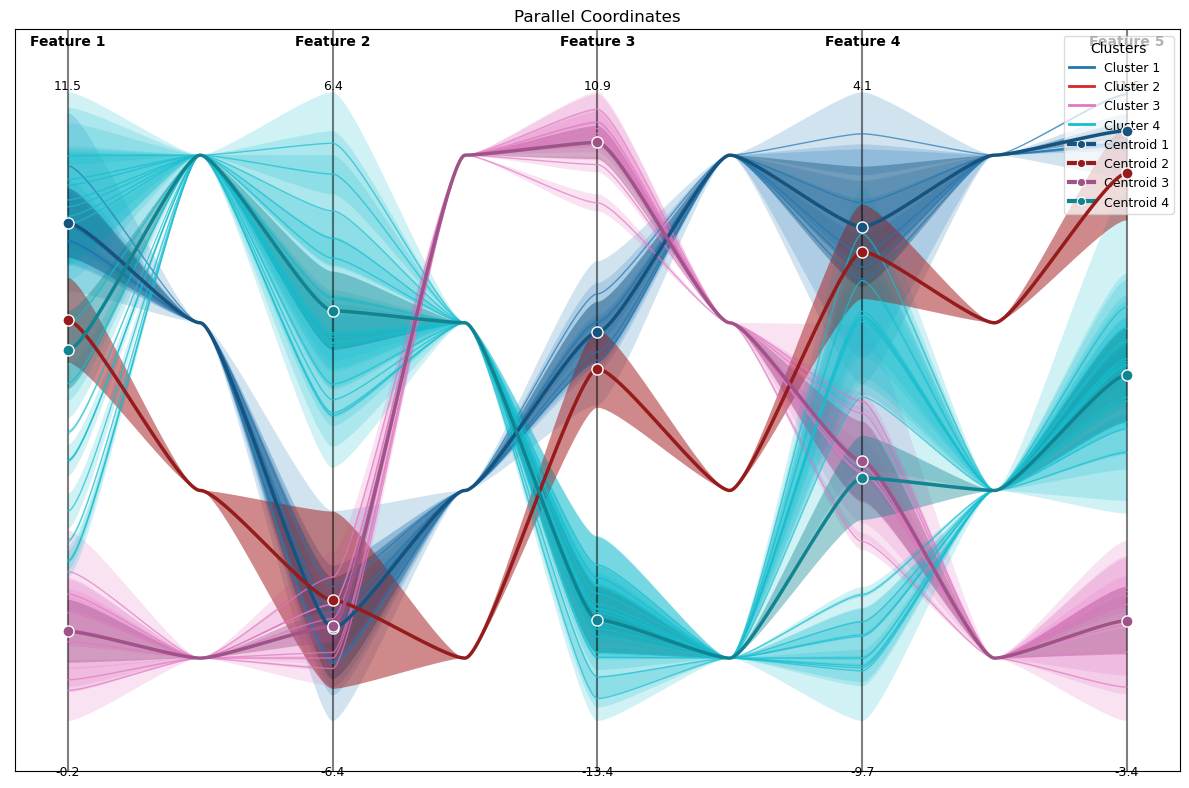

In [20]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), feature_names= None, centroids= model.centroids_,labels=model.labels_, beta = 1)


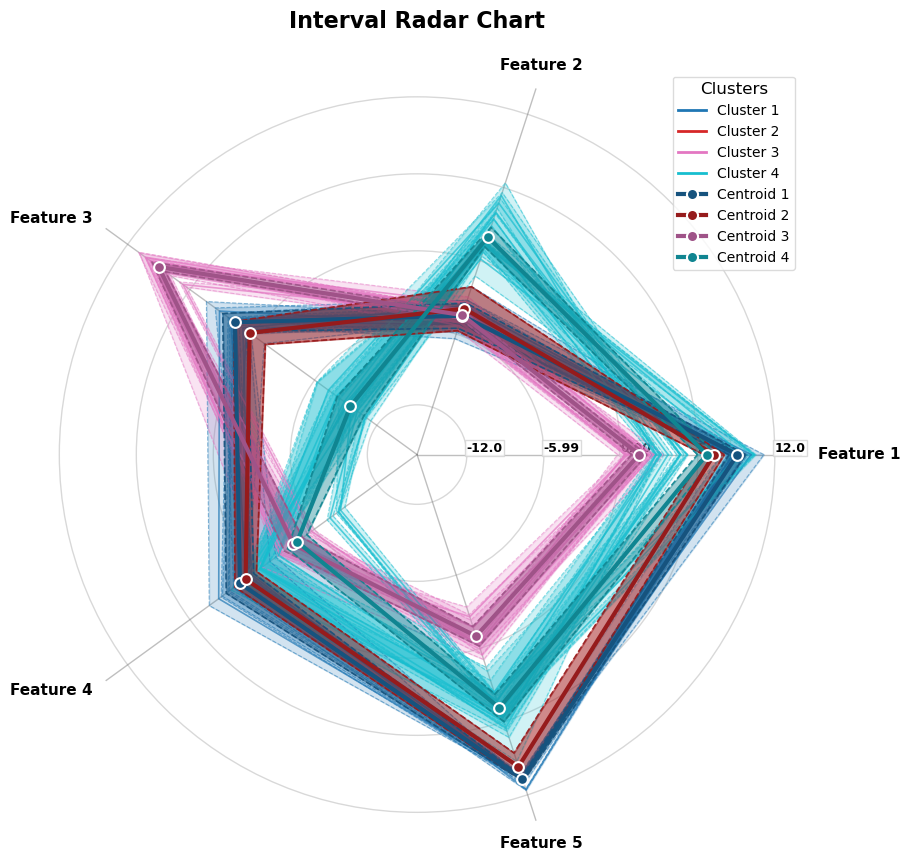

In [21]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=model.centroids_,
    labels=model.labels_, 
    title="Interval Radar Chart"
)

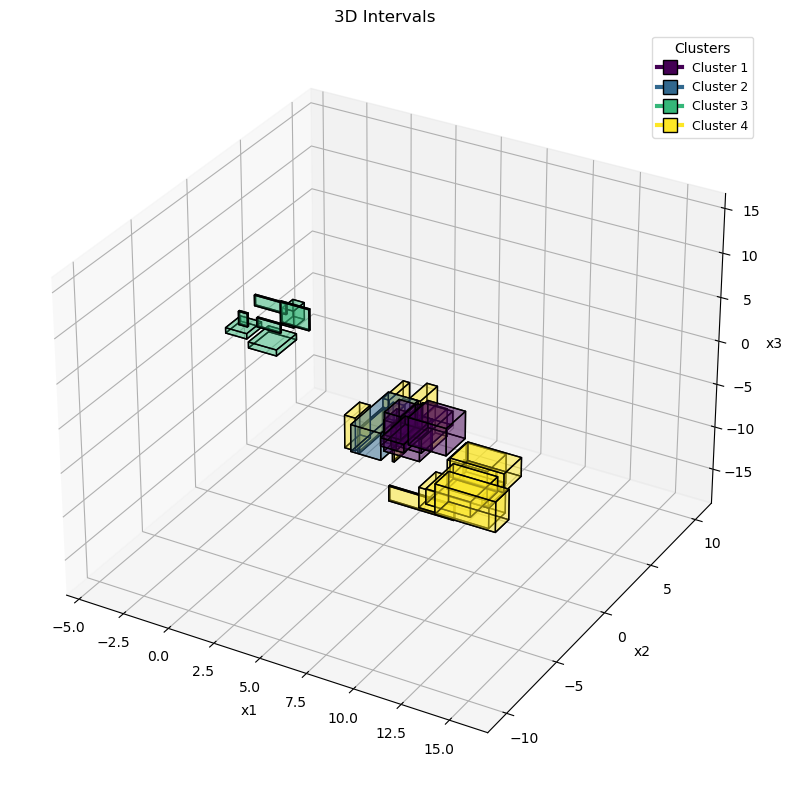

In [22]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          2.434310         3.030369         0.763350         2.239479   
1         -0.247213         0.895133        -5.655832        -4.299411   
2          4.569429         4.669429         2.840542         5.100403   
3          0.287266         0.759486        -5.352876        -5.252876   
4          5.104281         5.204281         0.710939         1.853487   
5          8.332168        11.224495         0.563962         2.360176   
6          7.159706        10.936216        -0.390838         1.310484   
7          4.337084         4.920739         3.847608         5.586053   
8          8.591957         8.845618        -5.689610        -3.219704   
9          8.259112        11.514402        -0.807307         0.564250   
10         0.716840         2.231036        -5.221365        -3.367782   
11         5.744746         6.398117         2.175663         3.852313   
12         7.9

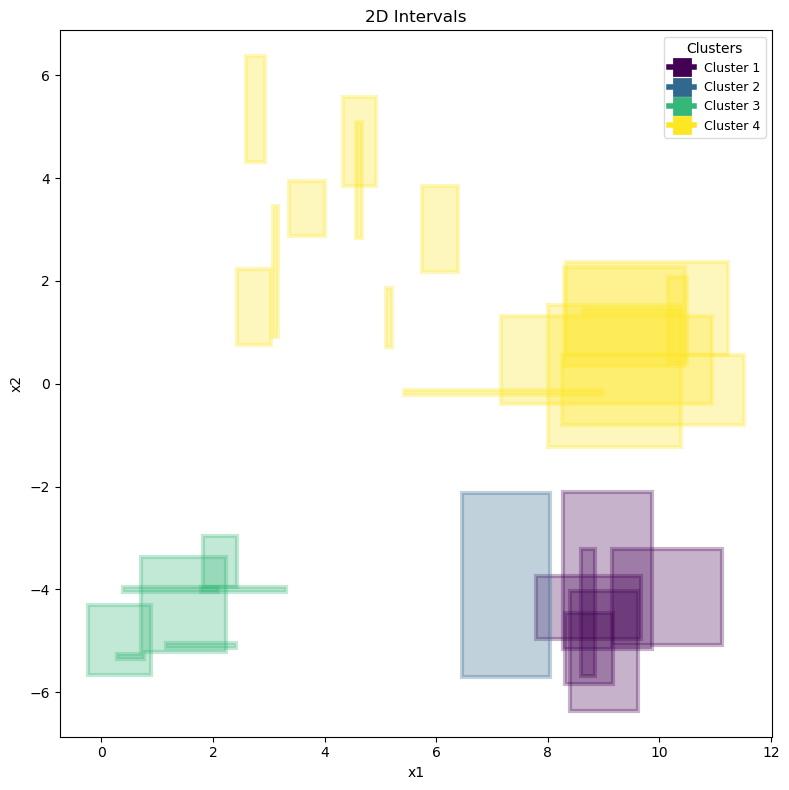

In [17]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

fig, ax = Interval2d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = model.labels_, fill_intervals=True)